In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set() # Use default plots from seaborn

In [2]:
# Read MTurk results into dataframes
s4_df = pd.read_csv('section4-original-semantic-labels.csv')
print(s4_df.shape) 
s5_df = pd.read_csv('section5-reproduction-semantic-labels.csv')
print(s5_df.shape)

(4000, 37)
(9930, 39)


In [3]:
# Map responses to numerical values on Likert scale
label_map = { 'Strongly Agree': 5, 'Agree': 4, 'Not sure': 3, 'Disagree': 2, 'Strongly Disagree': 1}
s4_df['label'] = s4_df['Answer.semantic-similarity.label'].map(lambda s: label_map[s])
s5_df['label'] = s5_df['Answer.semantic-similarity.label'].map(lambda s: label_map[s])

In [4]:
print('s4 mean:', s4_df['label'].mean())
print('s5 mean:', s5_df['label'].mean())

s4 mean: 3.13225
s5 mean: 4.025176233635448


In [6]:
print('s4.columns:', s4_df.columns)
print('s5.columns:', s5_df.columns)

s4.columns: Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate',
       'Input.USE_similarity', 'Input.dataset', 'Input.original_class',
       'Input.text1', 'Input.perturbed_class', 'Input.text2', 'Input.run_type',
       'Answer.semantic-similarity.label', 'Approve', 'Reject', 'label'],
      dtype='object')
s5.columns: Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'Auto

In [19]:
dataset_name_map = { 'movie_review': 'mr', 'yelp_polarity': 'yelp-sentiment' }
s4_df['dataset'] = s4_df['Input.dataset'].map(lambda x: dataset_name_map.get(x,x))

Text(0.5,1,'Score increases by dataset')

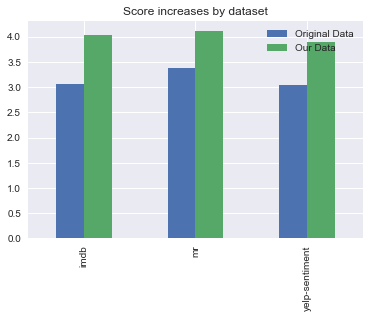

In [46]:
s4_by_dataset = s4_df.groupby('dataset')['label'].mean().to_frame().rename(columns={ 'label': 'Original Data' })
s5_by_dataset = s5_df.groupby('Input.dataset')['label'].mean().to_frame().rename(columns={ 'label': 'Our Data' })

ax = pd.concat((s4_by_dataset, s5_by_dataset), axis=1).plot(kind='bar')
ax.set_title('Score increases by dataset')

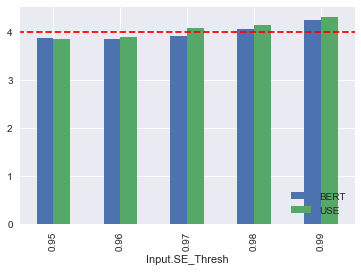

In [112]:
ax = s5_df.groupby(('Input.SE_Thresh', 'Input.SE_Model'))['label'].mean().unstack(level=-1).plot(kind='bar')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='lower right')
# add horizontal line at y=4
xs = np.linspace(-5, 5)
horiz_line_data = np.array([4 for i in range(len(xs))])
ax.plot(xs, horiz_line_data, 'r--') 

plt.savefig('use-thresh-bert-and-use', format='pdf')

In [104]:
def _c(t):
    """ converts RGB tuple to a color format matplotlib understands """
    if len(t) == 3: #add opacity
        t = t + (255.0,)
    return [tuple((x/255. for x in t),)]

In [134]:
# original: get_ticks returns = [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
use_thresh_graph_yticks = ['', '1 - Strongly Disagree', '2 - Disagree', '3 - Not Sure', '4 - Agree', '5 - Strongly Agree']

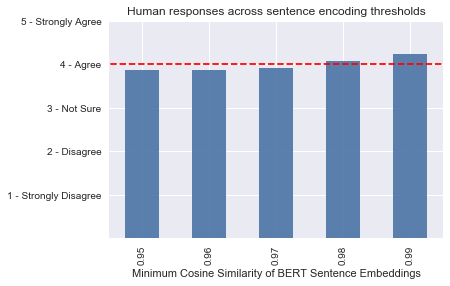

In [154]:
bert_df = s5_df[s5_df['Input.SE_Model'] == 'BERT']
ax = bert_df.groupby('Input.SE_Thresh')['label'].mean().plot(kind='bar', color=_c((75, 115, 165, 230.0)))
# style graph
ax.set_ylim(0.0, 5.0) # This 
ax.set_yticklabels(use_thresh_graph_yticks)
ax.set_title('Human responses across sentence encoding thresholds')
ax.set_xlabel('Minimum Cosine Similarity of BERT Sentence Embeddings')
# add horizontal line at y=4
xs = np.linspace(-5, 5)
horiz_line_data = np.array([4 for i in range(len(xs))])
# plot and save
ax.plot(xs, horiz_line_data, 'r--', color='red') 
plt.savefig('bert-thresh-final.pdf', format='pdf')

In [152]:
s5_df.shape

(9930, 40)

In [158]:
s4_df.groupby(('Input.run_type', 'Input.dataset'))['label'].mean()

Input.run_type  Input.dataset
alzantot        imdb             2.695
jin             imdb             3.414
                movie_review     3.370
                yelp_polarity    3.050
Name: label, dtype: float64

In [160]:
bert_df[s5_df['Input.SE_Thresh'] == 0.98].groupby('Input.dataset')['label'].mean()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Input.dataset
imdb              4.055102
mr                4.181250
yelp-sentiment    3.936842
Name: label, dtype: float64